## Análisis de datos - Clase 2

## Introducción al EDA: medidas estadísticas descriptivas 
<hr style="border:1px solid gray">

In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import describe

#### Funciones auxiliares (helper functions)



In [695]:
# Función para graficar
def plot_histograma(data, column, figsize=(6, 3), bins=15, kde=True, mvd=True, snk=False):
    skewness = (data[column].dropna()).skew()
    kurtosis = (data[column].dropna()).kurt()
    media = (data[column].dropna()).mean()
    var = (data[column].dropna()).var()
    std = (data[column].dropna()).std()
    plt.figure(figsize=figsize)
    plt.grid(axis='y')
    sns.histplot(data[column].dropna(), bins=bins, kde=kde)
    if snk:
        plt.figtext(0.7, 0.8, f'Asimetría: {skewness:.2f}', fontsize=10, color='blue')
        plt.figtext(0.715, 0.73, f'Curtosis: {kurtosis:.2f}', fontsize=10, color='blue')
    plt.axvline(media, color='red', linestyle='--', label='Media')
    if mvd:
        plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.73, f'Var: {var:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.66, f'Std: {std:.2f}', fontsize=10, color='red')
    plt.title(f'Variable: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return

#### Datasets que vamos a utilizar (incluidos en la biblioteca Seaborn)
---

#### Descripción del dataset Titanic de Seaborn


| Variable      | Descripción                                                                      |
| ------------- | ---------------------------------------------------------------------------------- |
| `survived`    | 0 = No sobrevivió, 1 = Sobrevivió                                                  |
| `pclass`      | Clase del boleto: 1ª, 2ª o 3ª                                                      |
| `sex`         | Sexo del pasajero (`male`, `female`)                                               |
| `age`         | Edad del pasajero (en años)                                                        |
| `sibsp`       | Número de hermanos o cónyuges a bordo                                              |
| `parch`       | Número de padres o hijos a bordo                                                   |
| `fare`        | Tarifa pagada por el boleto                                                        |
| `embarked`    | Puerto de embarque (`C` = Cherborough, `Q` = Queenstown, `S` = Southampton)          |
| `class`       | Clase del pasajero como string (`First`, `Second`, `Third`) — derivado de `pclass` |
| `who`         | Grupo (`man`, `woman`, `child`) — categorizado a partir de edad y sexo  |
| `adult_male`  | Booleano: ¿Es un hombre adulto?                                                    |
| `deck`        | Letra de la cubierta del camarote (`A` a `G`, o `NaN`)                             |
| `embark_town` | Ciudad de embarque                                               |
| `alive`       | `yes`/`no` según haya sobrevivido                                                  |
| `alone`       | Booleano: ¿Viajaba solo? (`True` si `sibsp + parch == 0`)                          |

#### Descripción del dataset de Pingüinos

| Variable            | Descripción                                              |
| ------------------- | --------------------------------------------------------- |
| `species`           | Especie del pingüino (`Adelie`, `Gentoo`, `Chinstrap`)    |
| `island`            | Isla donde fue observado (`Torgersen`, `Biscoe`, `Dream`) |
| `bill_length_mm`    | Largo del pico (en milímetros)                            |
| `bill_depth_mm`     | Profundidad (alto) del pico (en milímetros)               |
| `flipper_length_mm` | Largo de la aleta (en milímetros)                         |
| `body_mass_g`       | Masa corporal (en gramos)                                 |
| `sex`               | Sexo del pingüino (`male`, `female`)                      |
| `year`              | Año de recolección del dato (`2007`, `2008`, `2009`)      |


#### Importamos los datasets
---


In [696]:
# Cargamos el dataset de Titanic
titanic_df = sns.load_dataset('titanic') # sns.load_dataset Devuelve un Pandas DF

# Cargamos el dataset de pingüinos 
pinguinos_df = sns.load_dataset('penguins') # sns.load_dataset Devuelve un Pandas DF

#### Primera inspección
<hr style="border:1px solid gray">

#### a. Titanic
---

In [697]:
print(f"Dimensiones del dataset original: {titanic_df.shape}")
titanic_df.head()

Dimensiones del dataset original: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [698]:
# Describimos el dataset
titanic_df = titanic_df.dropna() # Eliminamos los datos nulos con dropna()
print(f"Dimensiones del dataset sin nulos: {titanic_df.shape}")
titanic_df.head()

Dimensiones del dataset sin nulos: (182, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


#### b. Pingüinos
---

In [699]:
print(f"Dimensiones del dataset original: {pinguinos_df.shape}")
pinguinos_df.head()

Dimensiones del dataset original: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [700]:
pinguinos_df = pinguinos_df.dropna() # Borramos los NaN al igual que en el caso anterior
print(f"Dimensiones del dataset sin nulos: {pinguinos_df.shape}")
pinguinos_df.head()

Dimensiones del dataset sin nulos: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Análisis de las variables numéricas
<hr style="border:1px solid gray">


#### Histogramas

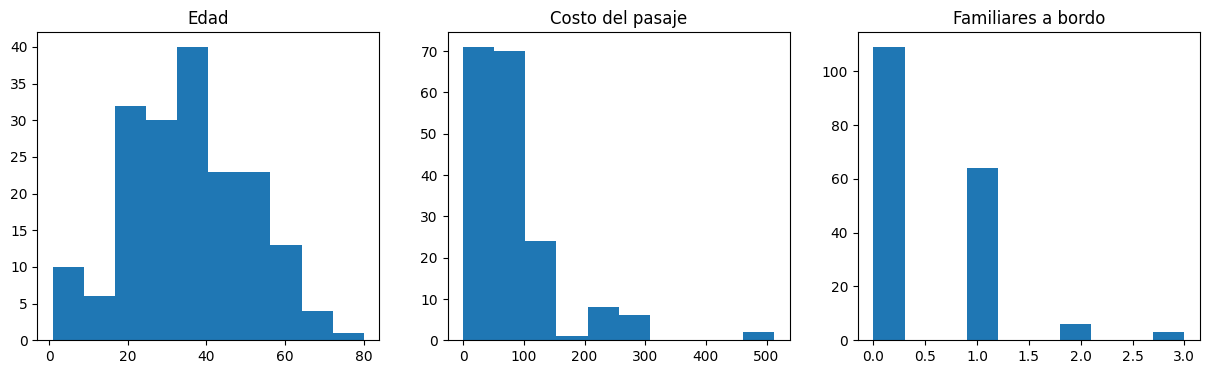

In [701]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(titanic_df['age'])   # edad
ax[0].set_title('Edad')
ax[1].hist(titanic_df['fare'])  # costo del pasaje
ax[1].set_title('Costo del pasaje')
ax[2].hist(titanic_df['sibsp']) # familiares
ax[2].set_title('Familiares a bordo')

plt.show()


#### Variantes del histograma de edad

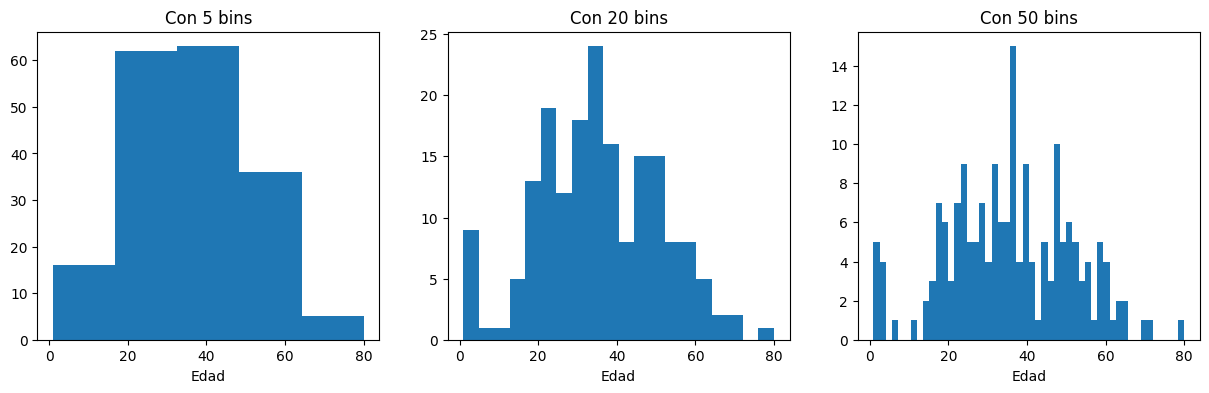

In [702]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(titanic_df['age'], bins=5)
ax[0].set_title('Con 5 bins')
ax[0].set_xlabel('Edad')
ax[1].hist(titanic_df['age'], bins=20)
ax[1].set_title('Con 20 bins')
ax[1].set_xlabel('Edad')
ax[2].hist(titanic_df['age'], bins=50)
ax[2].set_title('Con 50 bins')
ax[2].set_xlabel('Edad')

plt.show()

### 1. Medidas de tendencia central: media, mediana y moda
<hr style="border:1px solid gray">


#### Media

In [703]:
np.mean(titanic_df['age'])    # con NumPy

35.62318681318681

In [704]:
titanic_df['age'].mean()      # con Pandas

35.62318681318681

#### Mediana

In [734]:
np.median(titanic_df['age'])  # con NumPy

36.0

In [ ]:
titanic_df['age'].median()    # con Pandas

28.0

#### Moda

In [ ]:
titanic_df['age'].mode()[0]                            # con Pandas

24.0

In [ ]:
mode_age = st.mode(titanic_df['age'], keepdims=False)  # con SciPy
mode_age.mode

24.0

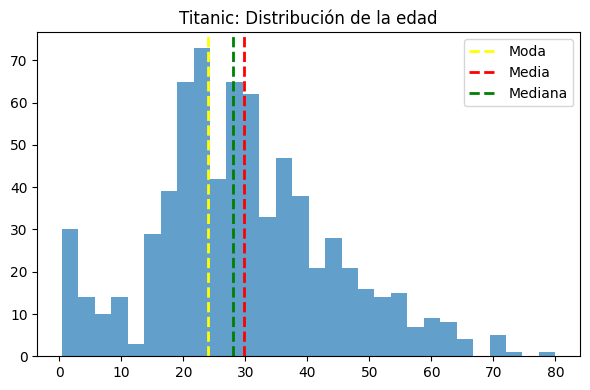

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(titanic_df['age'], bins=30, alpha=0.7) # dibujar histograma
ax.axvline(titanic_df['age'].mode()[0], color='yellow', ls='--', lw=2, label='Moda')
ax.axvline(titanic_df['age'].mean(), color='red', ls='--', lw=2, label='Media')
ax.axvline(titanic_df['age'].median(), color='green', ls='--', lw=2, label='Mediana')
ax.set_title('Titanic: Distribución de la edad')
ax.legend()

plt.tight_layout()
plt.show()

#### Comparamos la distribución de las tres variables: edad, costo del pasaje y número de familiares

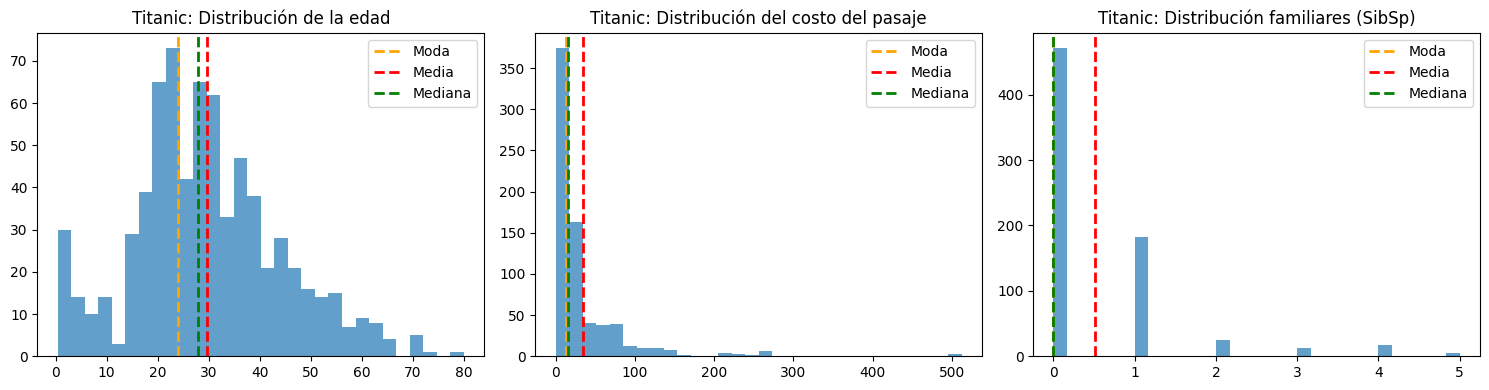

In [710]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Función para graficar
def plot_distribution(ax, data, title):
    ax.hist(data, bins=30, alpha=0.7) # dibujar histograma
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Moda') # dibujar la moda
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Media') # dibujar la media
    ax.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana') # dibujar la mediana
    ax.set_title(title)
    ax.legend()

plot_distribution(axes[0], df['age'], 'Titanic: Distribución de la edad')
plot_distribution(axes[1], df['fare'], 'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], df['sibsp'], 'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

#### ¿Qué métrica representa mejor cada variable (edad, costo, familiares)?

### 2. Medidas de dispersión: varianza y desviación estándar
<hr style="border:1px solid gray">


In [711]:
# Renombramos las columnas
pinguinos_df.columns = ['especie', 'isla', 'largo_pico', 'ancho_pico', 'largo_aleta', 'masa_corporal', 'sexo']    

In [712]:
# Calculamos la media, varianza y desviación estándar del largo de las aletas
media = pinguinos_df['largo_aleta'].mean()
var = pinguinos_df['largo_aleta'].var()
std_dev = pinguinos_df['largo_aleta'].std()
print(f'La media del largo de las aletas es {media:.2f} mm., \nla varianza es {var:.4f} mm. y \nla desviación estándar es {std_dev:.4f} mm.')

La media del largo de las aletas es 200.97 mm., 
la varianza es 196.4417 mm. y 
la desviación estándar es 14.0158 mm.


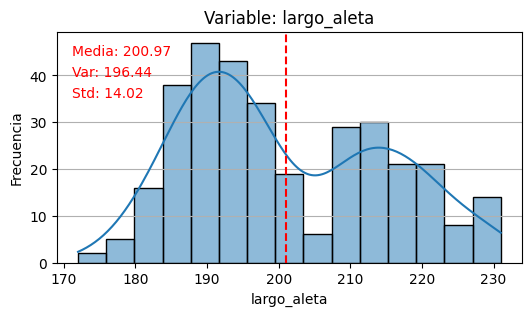

In [713]:
# Usamos la función que definimos para graficar (ver sección HELPER FUNCTIONS)
plot_histograma(pinguinos_df, 'largo_aleta')

#### KDE: Kernel Density Estimation --> estimar la función de densidad de probabilidad (PDF)

<Axes: xlabel='largo_aleta', ylabel='Density'>

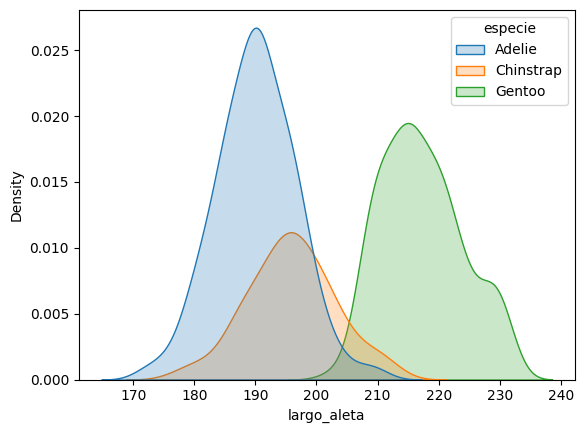

In [714]:

sns.kdeplot(data=pinguinos_df, x='largo_aleta', hue='especie', fill=True)

### 3. Cuantiles y rango intercuartil
<hr style="border:1px solid gray">


In [715]:
Q1 = pinguinos_df['largo_aleta'].quantile(0.25)
Q2 = pinguinos_df['largo_aleta'].quantile(0.50)  # Percentile 5-0 - Equivalente a la mediana
Q3 = pinguinos_df['largo_aleta'].quantile(0.75)

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)

Q1 (25%): 190.0
Q2 (Mediana, 50%): 197.0
Q3 (75%): 213.0


In [716]:
IQR = Q3 - Q1
print("Rango intercuartil (IQR):", IQR)

Rango intercuartil (IQR): 23.0


#### Visualizamos estas variables con Boxplots

In [717]:
# para actualizar Seaborn a la versión seaborn-0.13.2
# pip install --upgrade seaborn

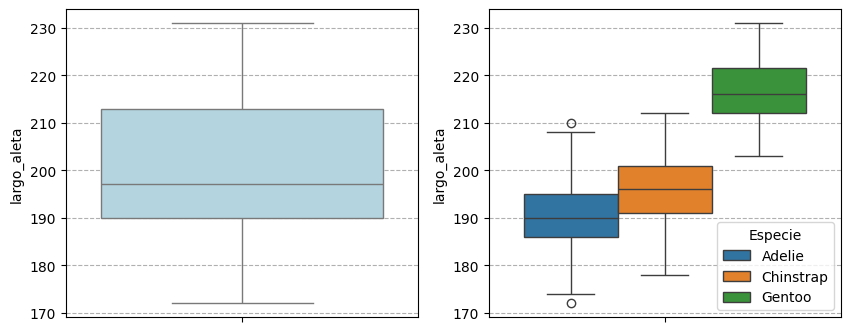

In [718]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=pinguinos_df, y='largo_aleta', color="lightblue", ax=ax[0])
sns.boxplot(data=pinguinos_df, y='largo_aleta', hue='especie', ax=ax[1])         # con seaborn-0.13.2

ax[0].grid(axis='y', ls='--')
ax[1].grid(axis='y', ls='--')
plt.legend(title='Especie', loc='lower right')


plt.show()

#### Violinplot: cuando necesito comparar distribuciones entre grupos, identificar distribuciones complejas, etc.

<Axes: xlabel='largo_aleta', ylabel='especie'>

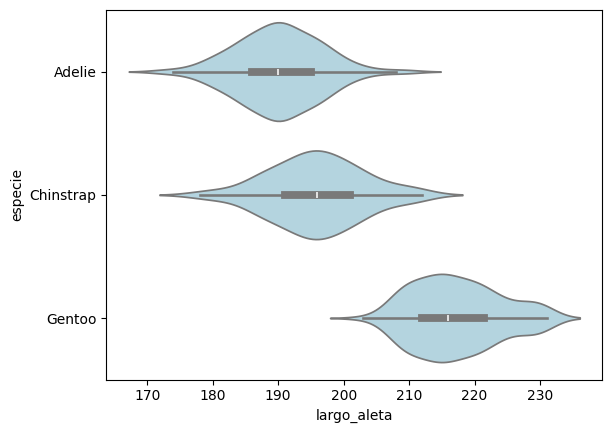

In [719]:
sns.violinplot(data=pinguinos_df, x='largo_aleta', y='especie', color="lightblue", inner="box")

<Axes: xlabel='largo_aleta', ylabel='especie'>

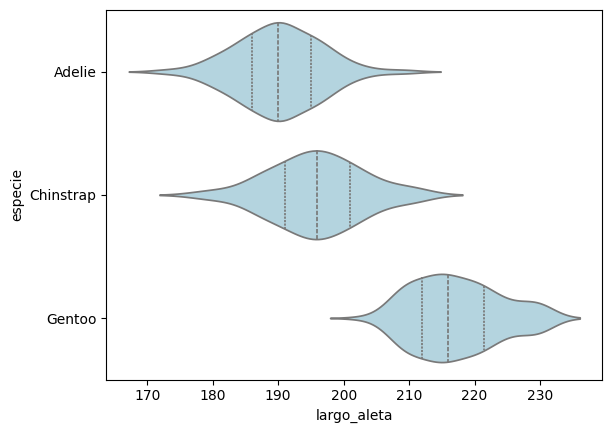

In [720]:
sns.violinplot(data=pinguinos_df, x='largo_aleta', y='especie', color="lightblue", inner="quartile")

Obs: la variable "especie" es muy importante dentro de este dataset, porque explica una gran parte de la variación de los otros features.

### 4. Medidas de forma: skewness (asimetría) y curtosis
<hr style="border:1px solid gray">


In [721]:
# Con Pandas
print(f"Asímetría de la variable masa_corporal: {pinguinos_df['masa_corporal'].skew()}")
print(f"Curtosis de la variable masa_corporal: {pinguinos_df['masa_corporal'].kurtosis()}")

Asímetría de la variable masa_corporal: 0.4722460732964026
Curtosis de la variable masa_corporal: -0.7334889525794943


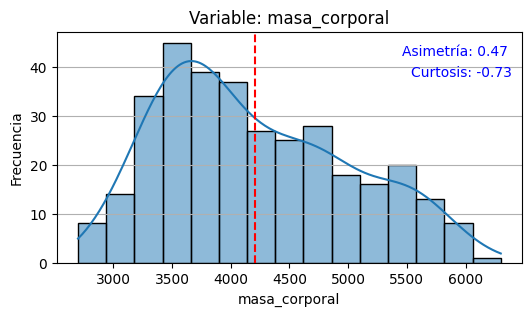

In [722]:
plot_histograma(pinguinos_df, 'masa_corporal',mvd= False, snk=True)

#### ¿Por qué decimos que la asímetría y la curtosis tienen más sentido en las distibuciones unimodales y continuas?

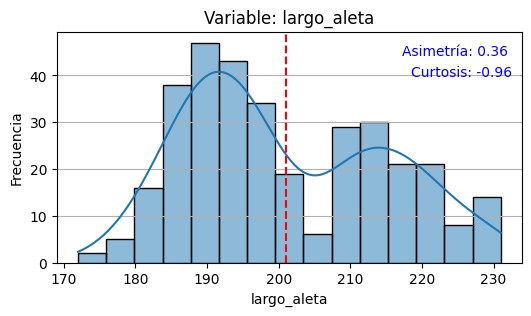

In [723]:
plot_histograma(pinguinos_df, 'largo_aleta',mvd= False, snk=True)

En el caso del largo de la aleta de los pingũinos, la distribución es bimodal y la curtosis y la asimetría ya no son tan fáciles de interpretar.

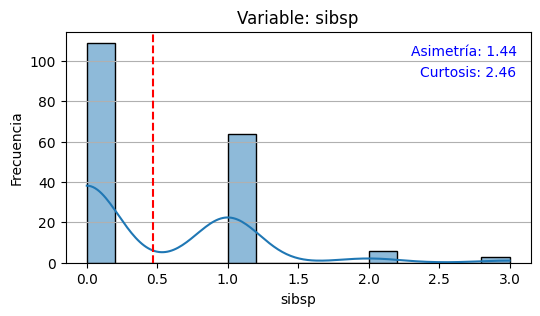

In [724]:
plot_histograma(titanic_df, 'sibsp', mvd= False, snk=True)


En el caso de las variables discretas, no se tiene un histograma "suave" (se visualizan escalones) y es difícil de interpretar la asimetría y la curtosis.

#### QQPlot

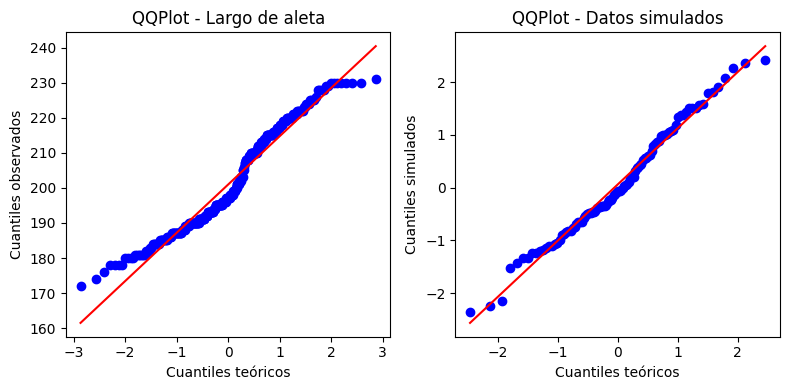

In [725]:
fig, (ax_ping, ax_normal) = plt.subplots(1, 2, figsize=(8, 4))

# QQPlot para largo de aleta de pingüinos
st.probplot(pinguinos_df['largo_aleta'], dist="norm", plot=ax_ping)
ax_ping.set_title("QQPlot - Largo de aleta")
ax_ping.set_xlabel("Cuantiles teóricos")
ax_ping.set_ylabel("Cuantiles observados")

# QQPlot para datos aleatorios con distribución normal
data = np.random.normal(loc=0, scale=1, size=100)
st.probplot(data, dist="norm", plot=ax_normal)
ax_normal.set_title("QQPlot - Datos simulados")
ax_normal.set_xlabel("Cuantiles teóricos")
ax_normal.set_ylabel("Cuantiles simulados")

plt.tight_layout()
plt.show()


### 5. Estadística descriptiva completa
<hr style="border:1px solid gray">


In [726]:
print("Estadística descriptiva del dataset Titanic:\n", df.describe())

Estadística descriptiva del dataset Titanic:
               age        fare       sibsp
count  714.000000  714.000000  714.000000
mean    29.699118   34.694514    0.512605
std     14.526497   52.918930    0.929783
min      0.420000    0.000000    0.000000
25%     20.125000    8.050000    0.000000
50%     28.000000   15.741700    0.000000
75%     38.000000   33.375000    1.000000
max     80.000000  512.329200    5.000000


In [727]:
# estadística básica + percentiles
df.describe(percentiles=[.1,.9,.95])

,age,fare,sibsp
count,714.000000,714.000000,714.000000
mean,29.699118,34.694514,0.512605
std,14.526497,52.918930,0.929783
min,0.420000,0.000000,0.000000
10%,14.000000,7.750000,0.000000
50%,28.000000,15.741700,0.000000
90%,50.000000,79.515000,1.000000
95%,56.000000,120.000000,2.000000
max,80.000000,512.329200,5.000000


#### Con Scipy (incluye skewness y kurtosis)

In [728]:
# Scipy scipy.stats.describe devuelve un objeto con estadísticas descriptivas
ed_titanic = st.describe(df)

ed_titanic_df = pd.DataFrame({  
    'Observaciones': ed_titanic.nobs,
    'Min': ed_titanic.minmax[0],
    'Max': ed_titanic.minmax[1],
    'Mean': ed_titanic.mean,
    'Varianza': ed_titanic.variance,
    'Asimetría': ed_titanic.skewness,
    'Curtosis': ed_titanic.kurtosis}, index=df.columns)

ed_titanic_df.head()


,Observaciones,Min,Max,Mean,Varianza,Asimetría,Curtosis
age,714,0.42,80.0000,29.699118,211.019125,0.388290,0.168637
fare,714,0.00,512.3292,34.694514,2800.413100,4.643848,30.699725
sibsp,714,0.00,5.0000,0.512605,0.864497,2.514280,6.987321


## Análisis de las variables categóricas
<hr style="border:1px solid gray">

#### a. Exploramos las variavles categóricas del dataset del Titanic

In [729]:
# Convertimos columnas del dataset del Titanic al tipo correcto
titanic_df['survived'] = titanic_df['survived'].astype('category')
titanic_df['sex'] = titanic_df['sex'].astype('category')
titanic_df['class'] = titanic_df['class'].astype('category')
titanic_df['embark_town'] = titanic_df['embark_town'].astype('category')

In [730]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    category
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    category
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    category
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(5), float64(2), int64(3), object(3)
memory usage: 14.9+ KB


In [731]:
titanic_df.describe(include='category')

# count = cant. de datos no nulos
# unique = cantidad de categorias distintas
# top = categoria con mayor frecuencia
# freq = frecuencia de la categoria top

,survived,sex,class,deck,embark_town
count,182,182,182,182,182
unique,2,2,3,7,3
top,1,male,First,C,Southampton
freq,123,94,157,51,115


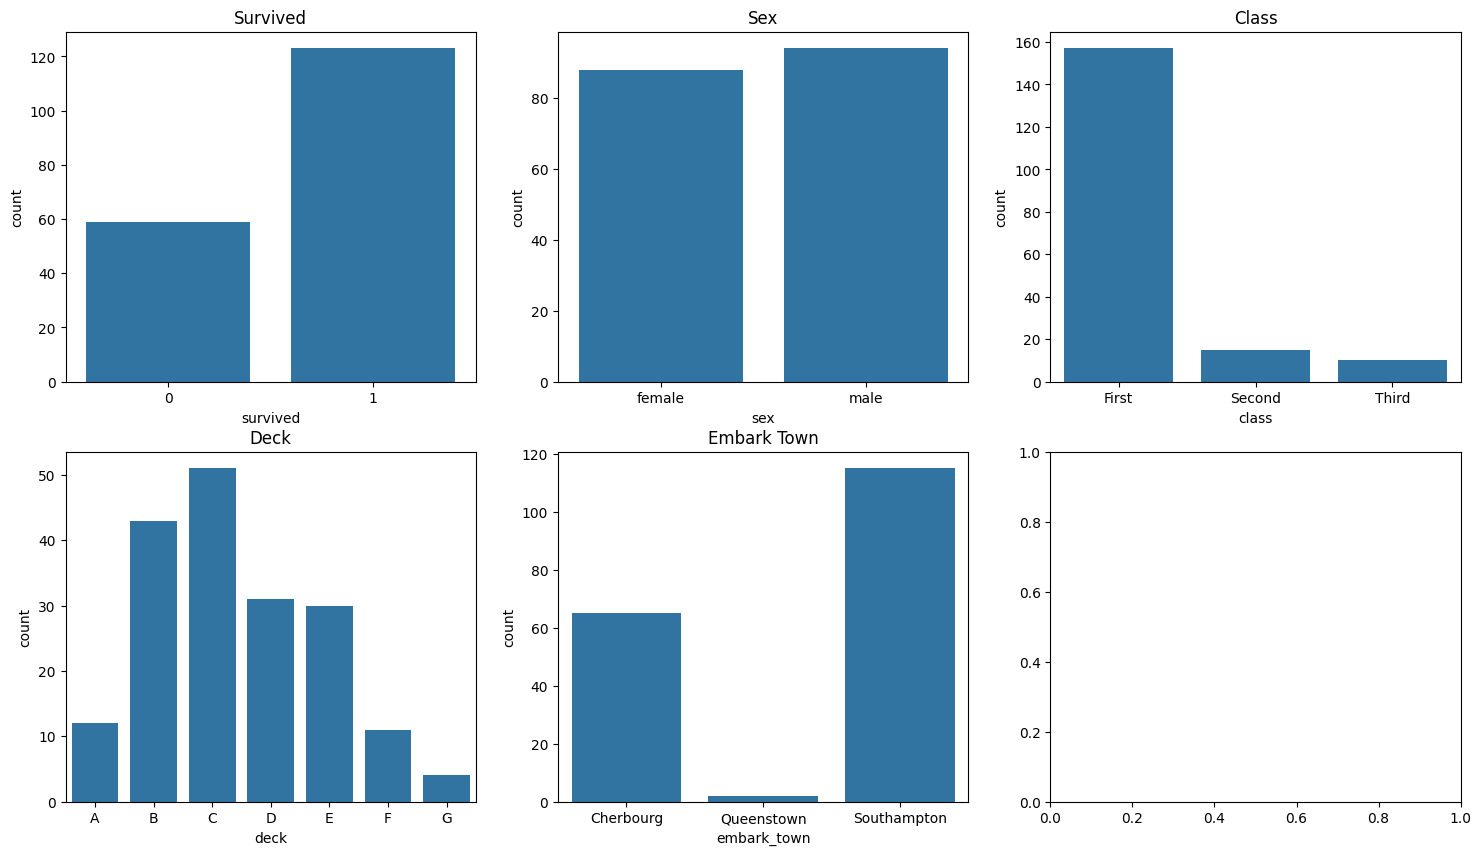

In [732]:
# Crear cada cajita
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Gráficos de barras de cada una
sns.countplot(x='survived', data=titanic_df, ax=ax[0,0])
sns.countplot(x='sex', data=titanic_df, ax=ax[0,1])
sns.countplot(x='class', data=titanic_df, ax=ax[0,2])
sns.countplot(x='deck', data=titanic_df, ax=ax[1,0])
sns.countplot(x='embark_town', data=titanic_df, ax=ax[1,1])

# Títulos
ax[0,0].set_title('Survived')
ax[0,1].set_title('Sex')
ax[0,2].set_title('Class')
ax[1,0].set_title('Deck')
ax[1,1].set_title('Embark Town')

plt.show()

#### Visualizamos pares de variables

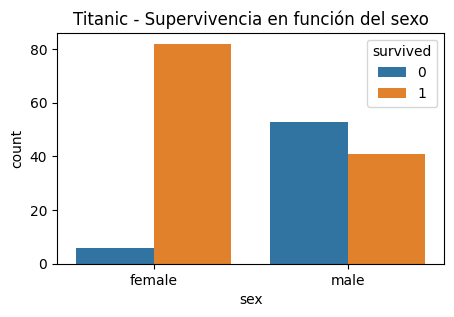

In [739]:
# Cuántas personas sobrevivieron de cada sexo?
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', hue='survived', data=titanic_df)
plt.title("Titanic - Supervivencia en función del sexo")
plt.show()

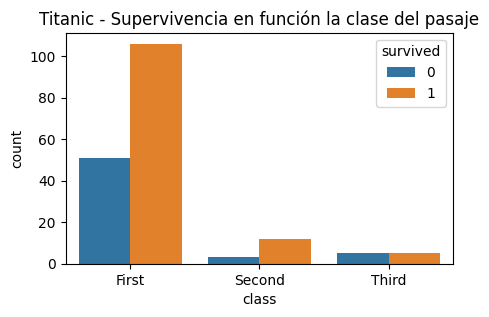

In [740]:
# Cómo se relaciona la supervivencia con la clase del pasaje?
plt.figure(figsize=(5, 3))
sns.countplot(x='class', hue='survived', data=titanic_df)
plt.title("Titanic - Supervivencia en función la clase del pasaje")
plt.show()